
# Project: Investigate a Dataset (TMdB Movie Data !!!!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>    
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project aims to apply data analysis concepts taught through the lessons in  a practical real world example problem.

I have been interested to analyze the data of The Movie database (TMdb), I have tried to apply the stages of data analysis process through this database using python and pandas,

The main purpose of data analysis is to be able to extract valuable information, ask and answer questions about the data, Regarding the movie database, we could ask questions like:

### 1- For a specific year, Who were the most successful actors ?
### 2- Who are the most successful directors of all time ?
### 3- What was the most popular movie genre for each year ?
### 4- Does the month of release of a movie have an impact upon its popularity ?
### 5- How does the total movies budget and total revenue change over the years ?
### 6- Does movie runtime affects average vote ratings ?
### 7- Does movie budget affect average vote rating ?
### 8- What are the keywords most repeated with the high popular movies ?

In [1]:
# Importing needed packages and the 'magic word' to include plots in this notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

Data Wrangling is the process of exploring and cleaning the data so it would be suitable for analysis and calculations.
I have divided my work in two sections:

**First:** Explore the data and look for possible problems.

**Second:** Data cleaning, trying to solve these problems.

### Exploring Data

In [2]:
# Load data and print few lines
df = pd.read_csv('tmdb-movies.csv')
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


There appears to be several issues with this data:
    - There are missing values (NaN)
    - There are missing values that are represented by Zeroes 
    - Some items which have more than one value(like list of casts) are string and items are separated by "|" 
    - There seems to be outliers within this data, like the movie "Jurassic Park" has popularity of 32.98 , this seems to be very far from the mean popularity.

<AxesSubplot:>

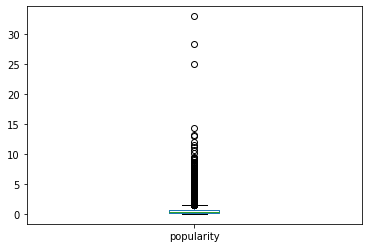

In [3]:
df.popularity.plot.box()

It is clear that there are several outliers within our data, in order to improve this analysis I have chosen to remove them.

In [4]:
# Check Data Types and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Data types are correct except "release_date", it is preferred to be in "datetime" format
and there are a lot of columns in these data that probably won't be needed in the analysis process, like the "overview" column which is just a description of the movie.

**I have decided to remove these columns: ['id','imdb_id','budget','revenue','homepage','tagline','overview']**

I have chosen to remove "budget" and "revenue" columns because their data doesn't count for inflation over the years, and there are another columns provided "budget_adj","revenue_adj" that counts for inflation, so it is more suitable to compare movies from different times.


<a id='cleaning'></a>

### Data Cleaning (Solving each of the problems)

In [5]:
## Remove unnecessary columns

for column in ['id','imdb_id','budget','revenue','homepage','tagline','overview']:
    df = df.drop(column,axis=1)


In [6]:
# Remove rows with outliers
outlier_columns = {'popularity','runtime','budget_adj','revenue_adj'} #Columns with possible outliers
for c in outlier_columns:
    mean = df[c].mean()                                                      #Calculate mean of column
    std_deviation = df[c].std()                                              #Calculate Standard deviation of column
    df.drop(df[np.absolute(df[c]-mean) > 3*std_deviation].index, inplace = True)   #If the distance between value and mean exceeds 3*(Standard deviation), remove that row

In [7]:
## Remove rows with missing values

df = df.replace(0, np.nan)       # Replace all values with zeroes with NaN
df = df.dropna(axis = 0,how='any')  #Remove all rows with any NaN value


In [8]:
df['release_date'] = pd.to_datetime(df['release_date']) ## Convert "release_date" column to datetime
df['release_month'] = df['release_date'].dt.month       ## Extract month from each date, append to new column(Will be used for analysis)

In [9]:
## It was noted that python to_datetime function parses some years incorrectly: 1960 would be returned as 2060
## the next line solves this issue:
df.loc[df['release_date'].dt.year >= 2021, 'release_date'] -= pd.DateOffset(years=100)
## if year is more than 2021, subtract 100 years from date.

In [10]:
## For the analysis, this divides ["popularity","vote_average"] columns into four different categories: ['low','moderate low','moderate high','high']
for c in ['popularity','vote_average']:
    minimum = df[c].describe().loc['min']         #save minimum value in column to "minimum" variable
    first_quartile = df[c].describe().loc['25%'] #save first quartile value in column to "first_quartile" variable
    second_quartile = df[c].describe().loc['50%'] #save second quartile value in column to "second_quartile" variable
    third_quartile = df[c].describe().loc['75%'] #save third quartile value in column to "third_quartile" variable
    maximum = df[c].describe().loc['max']        #save maximum value in column to "maximum" variable

    df[c+"_bins"] = pd.cut(df[c],[minimum-0.000001,first_quartile,second_quartile,third_quartile,maximum+0.0000001],labels=['low','moderate low','moderate high','high'])
## Create new column "<column name>_bins" to split popularity with edges from the saved variables
df.head()

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,popularity_bins,vote_average_bins
34,3.644541,Goosebumps,Jack Black|Dylan Minnette|Odeya Rush|Amy Ryan|...,Rob Letterman,based on novel|magic|fantasy|family|3d,103,Adventure|Horror|Comedy,Columbia Pictures|Original Film|Scholastic Ent...,2015-08-05,600,6.2,2015,5.335998e+07,1.381571e+08,8,high,moderate high
35,3.557846,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,Lenny Abrahamson,based on novel|carpet|isolation|imprisonment|g...,117,Drama|Thriller,Element Pictures|No Trace Camping|A24|Duperele...,2015-10-16,1520,8.0,2015,5.519998e+06,3.256960e+07,10,high,high
38,3.237370,Run All Night,Liam Neeson|Ed Harris|Joel Kinnaman|Boyd Holbr...,Jaume Collet-Serra,hitman|revenge|murder|on the run|mobster,114,Action|Crime|Drama|Mystery|Thriller,Vertigo Entertainment|Energy Entertainment|Rat...,2015-03-11,814,6.3,2015,4.599998e+07,6.583668e+07,3,high,moderate high
39,3.227329,Brooklyn,Saoirse Ronan|Domhnall Gleeson|Emory Cohen|Emi...,John Crowley,love triangle|based on novel|homesickness|voro...,111,Drama|Romance,Wildgaze Films|Irish Film Board|Item 7|Paralle...,2015-11-04,754,7.3,2015,1.012000e+07,5.711002e+07,11,high,high
40,3.202719,Straight Outta Compton,O'Shea Jackson Jr.|Corey Hawkins|Jason Mitchel...,F. Gary Gray,brother brother relationship|aids|police bruta...,147,Drama|Music,New Line Cinema|Universal Pictures|Legendary P...,2015-08-13,918,7.7,2015,2.575999e+07,1.855041e+08,8,high,high


In [11]:
## Converting strings with separator to list

for c in ['cast','director','genres','production_companies','keywords']:
    df[c] = df[c].apply(lambda x: x[:].split('|'))

**Let's view the dataset after the cleaning process**

In [12]:
df

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,popularity_bins,vote_average_bins
34,3.644541,Goosebumps,"[Jack Black, Dylan Minnette, Odeya Rush, Amy R...",[Rob Letterman],"[based on novel, magic, fantasy, family, 3d]",103,"[Adventure, Horror, Comedy]","[Columbia Pictures, Original Film, Scholastic ...",2015-08-05,600,6.2,2015,5.335998e+07,1.381571e+08,8,high,moderate high
35,3.557846,Room,"[Brie Larson, Jacob Tremblay, Joan Allen, Sean...",[Lenny Abrahamson],"[based on novel, carpet, isolation, imprisonme...",117,"[Drama, Thriller]","[Element Pictures, No Trace Camping, A24, Dupe...",2015-10-16,1520,8.0,2015,5.519998e+06,3.256960e+07,10,high,high
38,3.237370,Run All Night,"[Liam Neeson, Ed Harris, Joel Kinnaman, Boyd H...",[Jaume Collet-Serra],"[hitman, revenge, murder, on the run, mobster]",114,"[Action, Crime, Drama, Mystery, Thriller]","[Vertigo Entertainment, Energy Entertainment, ...",2015-03-11,814,6.3,2015,4.599998e+07,6.583668e+07,3,high,moderate high
39,3.227329,Brooklyn,"[Saoirse Ronan, Domhnall Gleeson, Emory Cohen,...",[John Crowley],"[love triangle, based on novel, homesickness, ...",111,"[Drama, Romance]","[Wildgaze Films, Irish Film Board, Item 7, Par...",2015-11-04,754,7.3,2015,1.012000e+07,5.711002e+07,11,high,high
40,3.202719,Straight Outta Compton,"[O'Shea Jackson Jr., Corey Hawkins, Jason Mitc...",[F. Gary Gray],"[brother brother relationship, aids, police br...",147,"[Drama, Music]","[New Line Cinema, Universal Pictures, Legendar...",2015-08-13,918,7.7,2015,2.575999e+07,1.855041e+08,8,high,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,0.670274,Who's Afraid of Virginia Woolf?,"[Elizabeth Taylor, Richard Burton, George Sega...",[Mike Nichols],"[alcohol, adultery, professor, married couple,...",131,[Drama],[Chenault Productions],1966-06-21,74,7.5,1966,5.038511e+07,2.266436e+08,6,moderate low,high
10828,0.402730,Torn Curtain,"[Paul Newman, Julie Andrews, Lila Kedrova, Han...",[Alfred Hitchcock],"[cold war, east germany]",128,"[Mystery, Thriller]",[Universal Pictures],1966-07-13,46,6.3,1966,2.015404e+07,8.733419e+07,7,low,moderate high
10829,0.395668,El Dorado,"[John Wayne, Robert Mitchum, James Caan, Charl...",[Howard Hawks],"[sheriff, ranch, liquor, settler, revolver]",120,"[Action, Western]","[Paramount Pictures, Laurel Productions]",1966-12-17,36,6.9,1966,3.125892e+07,4.030809e+07,12,low,high
10835,0.299911,The Sand Pebbles,"[Steve McQueen, Richard Attenborough, Richard ...",[Robert Wise],"[missionary, china, us navy, chinese, battle]",182,"[Action, Adventure, Drama, War, Romance]","[Twentieth Century Fox Film Corporation, Solar...",1966-12-20,28,7.0,1966,8.061618e+07,1.343603e+08,12,low,high


<a id='eda'></a>
## Exploratory Data Analysis

In this section I have tried to ask various questions about the data and answer them using analysis.

### Who were the most successful actors in 2013 ?

In [13]:
# Actors with most appearances in lot of movies in 2013
df_2013= df.loc[df['release_year'] == 2013] #filter by year value
df_2013['cast'].apply(pd.Series).stack().value_counts().head() ## append all items in one list, count repeated items


Ed Harris         4
Mark Wahlberg     4
James Franco      4
Robert De Niro    4
Steve Carell      3
dtype: int64

### Who are the most successful directors of all time ?

<AxesSubplot:xlabel='Director', ylabel='Number of Movies'>

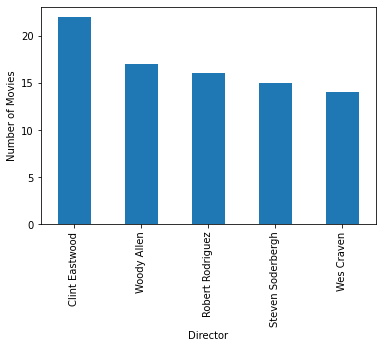

In [14]:
# directors with highest number of directed movies
df['director'].apply(pd.Series).stack().value_counts().head().plot(kind = 'bar',xlabel ='Director',ylabel='Number of Movies')


### For each year, what was the most popular movie genre ?

In [15]:
## To solve this question, we will filter only high popular movies. and check the most repeated genre for each year
years_list=df.release_year.unique()            ## Get list of all years
year_genres = {}

for year in years_list:
    try:
        df_temp = df[(df['release_year'] == year )& (df['popularity_bins'] == 'high')]   #Create df with only high popular movies AND of this year
        maximum = df_temp['genres'].apply(pd.Series).stack().value_counts().idxmax()    # Stack all the genres in list, get index of the most repeated genre
        year_genres[year] = maximum                                       #append this genre to year_genres dictionary with the key as the year
    except:
        print(str(year)+" has no high popular movies")

listt=[]
for key in year_genres.keys():
    listt.append(key)           ##create new list with years and sort it
listt.sort()
for key in listt:               ##print the dictionary key and value
    print("Year: "+str(key)+"   Top Genre: "+str(year_genres[key]))


1972 has no high popular movies
1962 has no high popular movies
1965 has no high popular movies
1969 has no high popular movies
1966 has no high popular movies
Year: 1960   Top Genre: Thriller
Year: 1961   Top Genre: Drama
Year: 1963   Top Genre: Horror
Year: 1964   Top Genre: War
Year: 1967   Top Genre: Comedy
Year: 1968   Top Genre: Mystery
Year: 1970   Top Genre: Adventure
Year: 1971   Top Genre: Drama
Year: 1973   Top Genre: Family
Year: 1974   Top Genre: Thriller
Year: 1975   Top Genre: Fantasy
Year: 1976   Top Genre: Thriller
Year: 1977   Top Genre: Adventure
Year: 1978   Top Genre: Horror
Year: 1979   Top Genre: Thriller
Year: 1980   Top Genre: Romance
Year: 1981   Top Genre: Adventure
Year: 1982   Top Genre: Action
Year: 1983   Top Genre: Action
Year: 1984   Top Genre: Fantasy
Year: 1985   Top Genre: Adventure
Year: 1986   Top Genre: Drama
Year: 1987   Top Genre: Thriller
Year: 1988   Top Genre: Comedy
Year: 1989   Top Genre: Adventure
Year: 1990   Top Genre: Drama
Year: 1991  

### Does movie popularity vary by the release month ?

<AxesSubplot:title={'center':'Popularity Vs. Release Month'}, xlabel='Month of Release', ylabel='Mean Popularity'>

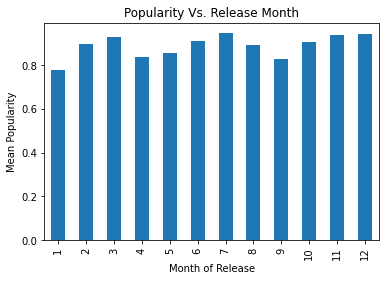

In [16]:
df.groupby('release_month').mean()['popularity'].plot(kind='bar',xlabel='Month of Release',ylabel='Mean Popularity',title="Popularity Vs. Release Month") # Plot mean popularity for each month
    

It appears that movies released in months 7,11,12 are the most popular
#### Conclusion: Maybe it's better for producers to release their movies in these months

### How much did total budget and total revenue for each year change over time ?

<AxesSubplot:title={'center':'Total Budget and Revenue for each Year'}, xlabel='Year', ylabel='Sum'>

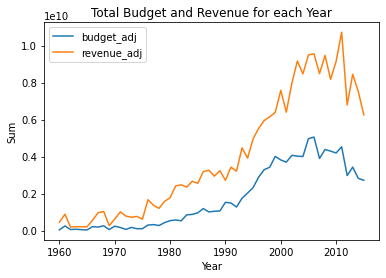

In [17]:
df.groupby('release_year').sum()[['budget_adj','revenue_adj']].plot(xlabel='Year',ylabel='Sum',title='Total Budget and Revenue for each Year') #Plot mean budgets,revenues for each year

Movie budgets and revenues from 1960 to 1990 weren't as big as from 2000 to 2015, the movie industry has grown from 1990 to 2000, then dropped significantly after 2010

#### Conclusion: Movie Industry in the last century wasn't as big as it is right now.

### Does movie runtime affects average vote ratings ?

<AxesSubplot:title={'center':'Vote Rating Vs. Average Movie Runtime'}, xlabel='Vote Rating', ylabel='Average Movie Runtime'>

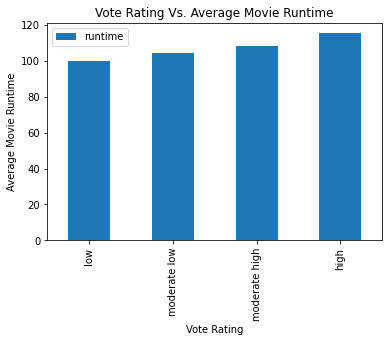

In [18]:
df.groupby('vote_average_bins').mean().plot(kind='bar',y = 'runtime',title='Vote Rating Vs. Average Movie Runtime',ylabel='Average Movie Runtime',xlabel='Vote Rating') #Plot mean runtime for each vote rating

It seems like longer movies get higher average vote ratings.
#### Conclusion: Maybe It's better for movie directors to go for longer movie runtimes.

### Does movie budget affect average vote rating ?

<AxesSubplot:title={'center':'Average Adjacent Budget Vs. Vote Rating'}, xlabel='Vote Rating', ylabel='Average Adjacent Budget'>

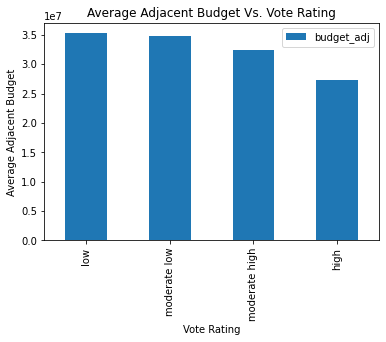

In [19]:
df.groupby('vote_average_bins').mean().plot(kind='bar',y = 'budget_adj',title="Average Adjacent Budget Vs. Vote Rating",xlabel='Vote Rating',ylabel='Average Adjacent Budget') #Plot mean budget for each vote rating

surprisingly, It seems that the movies with high average ratings have the lowest mean budget.

#### Conclusion: high movie budget isn't the main factor for movie success and getting high ratings, in fact, it may be the other way around.

### What are the keywords most repeated with the high popular movies?



In [20]:
df[df['popularity_bins']=='high'].keywords.apply(pd.Series).stack().value_counts().head()


based on novel          43
dystopia                34
high school             19
duringcreditsstinger    19
cia                     16
dtype: int64

#### Conclusion: it seems like that "based on novel" keyword is the most popular, Maybe movie producers should invest more in movies that are based on novels.

<a id='conclusions'></a>
## Conclusions


With experimenting and trial&error, I have tried to ask and answer questions about this dataset through data analysis,
and draw conclusions for each question, based on data variables.

#### but the analysis is not 100% accurate and has many limitations because:

    -Removing outliers from data changes the data analysis results significantly.
    
    -Removing data entries with missing values cleans the data, but at the cost of the data size, which results to less accurate data.
    
    -Correlation does not imply causation, as in the answer of "Does movie budget affect average vote rating ?"; it was found that movies with higher average vote rating have less mean budget, that does not mean that producers should spend less money on their movies to become popular, Instead, correlation encourages us to investigate more about the data and the questions we ask, so we can draw more valuable conclusions and information.
    
    -The algorithm used to answer the question: "how did most popular genre change over the years ?" is not perfect, for one year: if there are two genres with same number of repetitions, the algorithm will return only one, not both
    